## EMINEM YOUTUBE VIDEOSU YORUMLARI -SPAM DETECTION

<img src="https://i.ytimg.com/vi/cNLPt02RwF0/sddefault.jpg" alt="img">

<a href="https://www.kaggle.com/datasets/lakshmi25npathi/images" target="_blank">Data burada</a>

* Spam yorumları tespit etmek, Makine Öğrenimi'nde metin sınıflandırma görevidir. Sosyal medya platformlarında spam yorumları, kullanıcıyı başka bir sosyal medya hesabına, web sitesine veya herhangi bir içeriğe yönlendirmek amacıyla yapılan yorumlardır.

Spam yorumlarını tespit etmek için Makine Öğrenimi kullanıldığında, öncelikle spam yorumlarına dair etiketlenmiş verilere ihtiyaç vardır. Bu etiketlenmiş veriler, spam ve spam olmayan yorumları ayırt edebilmek için modelin eğitilmesine yardımcı olur. Datamız bu şekilde hazır, sonunda yorumlar word cloud ile de görslleştirdik.

In [1]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df=pd.read_csv('eminem.csv',encoding='latin-1')

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxxï»¿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />ï»¿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Coolï»¿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastineï»¿,1


In [4]:
df.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1,inplace=True)

In [5]:
df.head()

,CONTENT,CLASS
0,+447935454150 lovely girl talk to me xxxï»¿,1
1,I always end up coming back to this song<br />ï»¿,0
2,"my sister just received over 6,500 new <a rel=...",1
3,Coolï»¿,0
4,Hello I&#39;am from Palastineï»¿,1


<Axes: xlabel='CLASS', ylabel='count'>

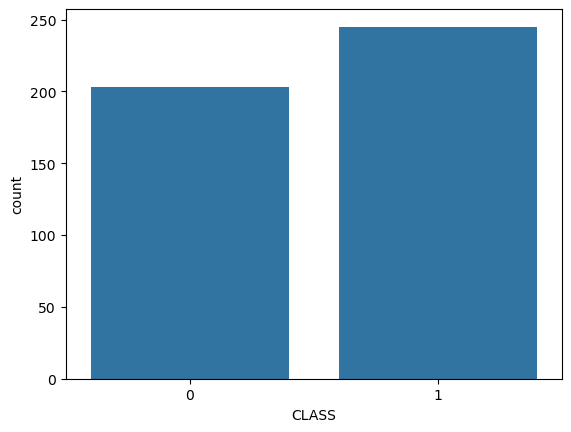

In [6]:
sns.countplot(x=df['CLASS'])

In [7]:
df['CONTENT']=df['CONTENT'].str.lower()
df['CONTENT']=df['CONTENT'].str.replace('[^\w\s]','') 
df['CONTENT']=df['CONTENT'].str.replace('\n','')
df['CONTENT']=df['CONTENT'].str.replace('\d+','') 
df['CONTENT']=df['CONTENT'].str.replace('\r','')

In [8]:
spam=df[df['CLASS']==1]['CONTENT'] #istenmeyen mesajlları 1 değişkenler atadık
ham=df[df['CLASS']==0]['CONTENT']

In [9]:
#wordcloud için fonksiyon oluşturuyoruz154
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('indir.jpeg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off') #X VE Y LERİ GÖSTERME
    # bunu eklediğimiz için wc deki stopwordleri keserek koydu onları almadı

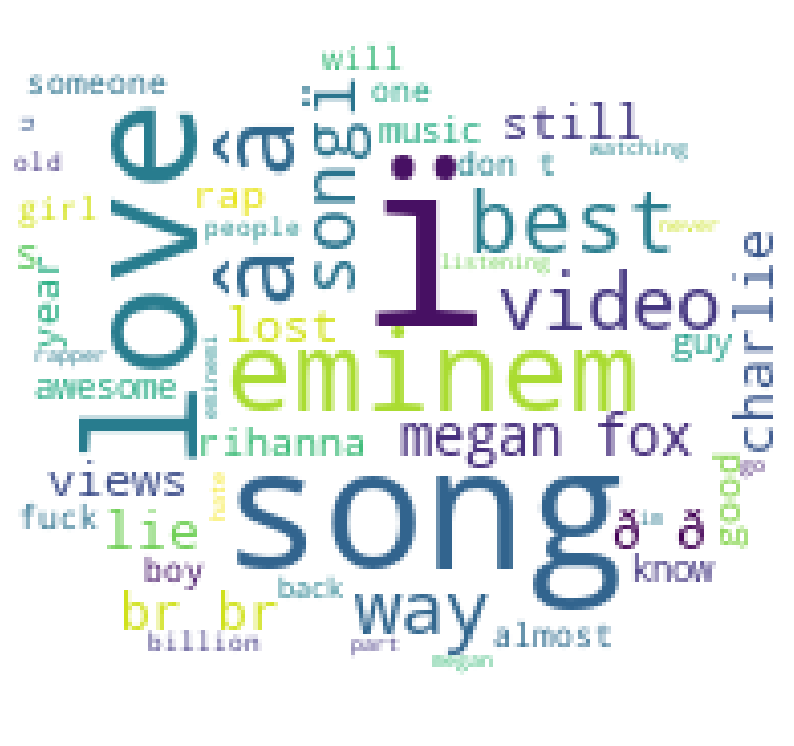

In [10]:
wc(ham,'white')

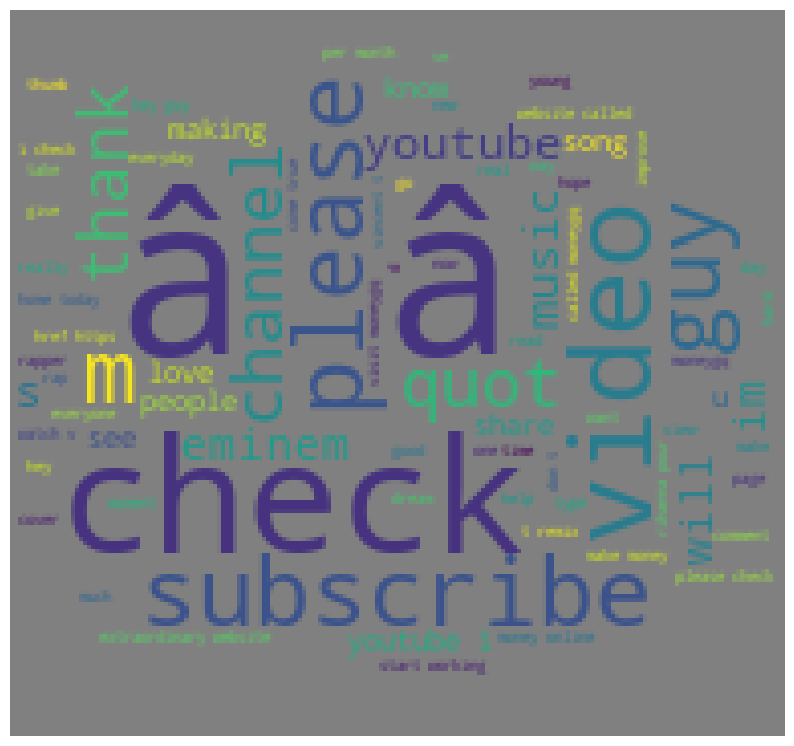

In [11]:
wc(spam,'gray')

## MODELLING

In [12]:
x=df['CONTENT']
y=df['CLASS']

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from textblob import TextBlob
pr=PorterStemmer()

In [14]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [15]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), analyzer=lemmafn)

In [16]:
x=vect.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [25]:
# x_train=vect.fit_transform(x_train)
# x_test=vect.fit_transform(x_test)

In [20]:
nb=MultinomialNB()

In [21]:
model=nb.fit(x_train,y_train)

In [22]:
tahmin=model.predict(x_test)

In [23]:
accuracy_score(tahmin,y_test)

0.9444444444444444

In [24]:
tahmin
#1.mesaj spam. 2.de3. ham vs....

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)